In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
input_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/Catalogs/catalog.xym'
data = pd.read_csv(input_file, sep='\t')

mag_limit = -5. 
data_spatial = data[(data['F814W'] < mag_limit) & (data['F555W'] < mag_limit)]

In [3]:
# Plot the spatial distribution and the selected old cluster (B 90) and young one (NGC 346)

# center and approximative radius of the old cluster
center_B90 = np.array([5000, 7000])
radius_B90 = 1000

# center and approximative radius of the reference field
center_reference = np.array([3000, 3000])
radius_reference = 1000

# compute the distance and select the stars in the two clusters
data['distance_B90'] = np.sqrt((data['x'] - center_B90[0]) ** 2 + (data['y'] - center_B90[1]) ** 2)
data['distance_reference'] = np.sqrt((data['x'] - center_reference[0]) ** 2 + (data['y'] - center_reference[1]) ** 2)

data_B90_cluster = data[data['distance_B90'] < radius_B90]
data_reference_field = data[data['distance_reference'] < radius_reference]

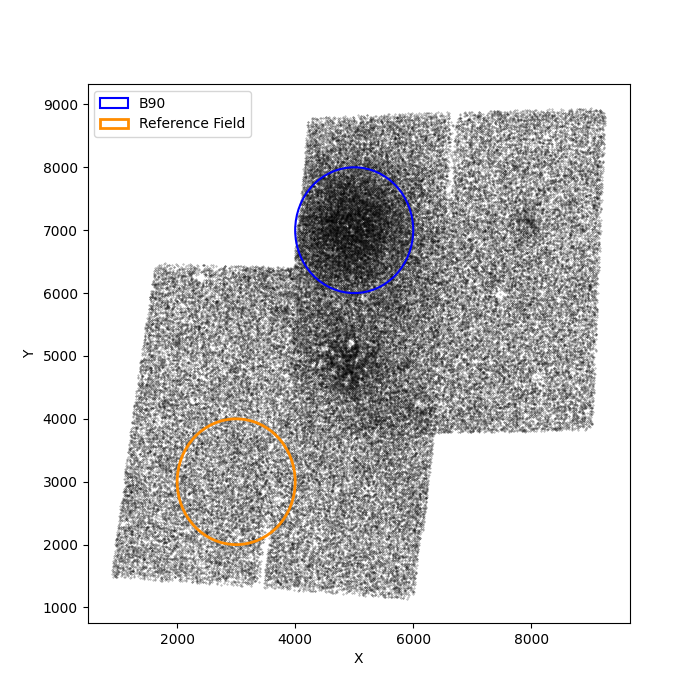

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(data_spatial['x'], data_spatial['y'], s=0.1, alpha=0.5, c='black') #c=data_spatial['F814W'], cmap = 'magma_r')
circle_B90 = plt.Circle(center_B90, radius_B90, color='blue', fill=False, linestyle='-', linewidth=1.5, label=r'B90')
ax.add_patch(circle_B90)
circle_reference = plt.Circle(center_reference, radius_reference, color='darkorange', fill=False, linestyle='-', linewidth=2, label=r'Reference Field')
ax.add_patch(circle_reference)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Load the data for the test stars, set the colormap.

In [5]:
import sys
import os

# set path to tools folder
module_path = '/Users/giadaaggio/Desktop/Thesis/TOTORO/CODES/tools'
sys.path.append(module_path)

from binaries_utils import BinaryStarUtils
binary = BinaryStarUtils()

colormap = plt.cm.jet

In [6]:
test_stars = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/test_stars_B90.csv', delim_whitespace=True)

test_stars['index'] = test_stars.index
color_test = binary.color_index(test_stars, 'index', colormap)

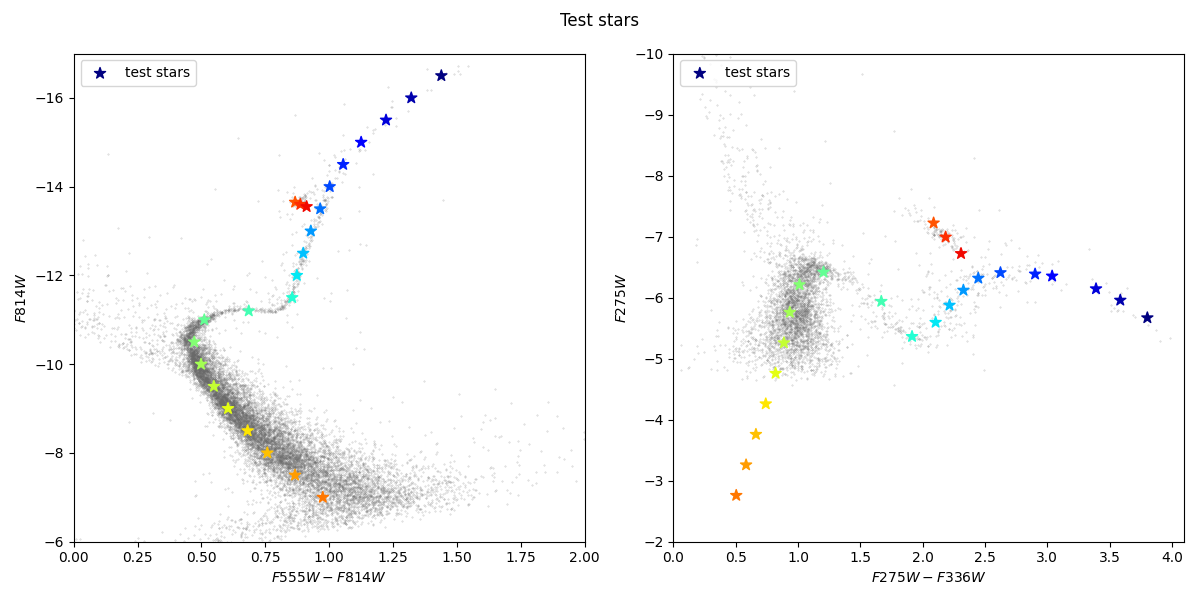

In [12]:
plt.figure(figsize=(12, 6))

# plot optical filters
plt.subplot(1, 2, 1)

plt.scatter(data_B90_cluster['F555W']-data_B90_cluster['F814W'], data_B90_cluster['F814W'], s=0.1, c='dimgray', alpha=0.4, zorder=1)
plt.scatter(test_stars['F555W']-test_stars['F814W'], test_stars['F814W'], s=70, c=color_test, label='test stars', marker='*', zorder=2)
plt.gca().invert_yaxis()

plt.xlim(0,2)
plt.ylim(-6,-17)

plt.xlabel(r'$F555W-F814W$')
plt.ylabel(r'$F814W$')
plt.legend(loc='upper left')

# plot UV filters
plt.subplot(1, 2, 2)

plt.scatter(data_B90_cluster['F275W']-data_B90_cluster['F336W'], data_B90_cluster['F275W'], s=0.1, c='dimgray', alpha=0.4, zorder=1)
plt.scatter(test_stars['F275W']-test_stars['F336W'], test_stars['F275W'], s=70, c=color_test, label='test stars', marker='*', zorder=2)
plt.gca().invert_yaxis()

plt.xlim(0,4.1)
plt.ylim(-2,-10)

plt.xlabel(r'$F275W-F336W$')
plt.ylabel(r'$F275W$')
plt.legend(loc='upper left')

plt.suptitle('Test stars')
plt.tight_layout()
plt.show()

In [14]:
# select the HB stars
hb_stars_index = test_stars.index[test_stars['source'] == 'HB_test_stars'].tolist()
hb_stars = test_stars.iloc[hb_stars_index]
print()

# binaries in visible
binaries_vis_HB = binary.binary_system_HB(test_stars, hb_stars_index, 'F555W', 'F814W')
color_vis = binary.color_index(binaries_vis_HB, 'secondary', colormap)

# binaries in UV
binaries_UV_HB = binary.binary_system_HB(test_stars, hb_stars_index, 'F275W', 'F336W')
color_UV = binary.color_index(binaries_UV_HB, 'secondary', colormap)

#binaries_vis_HB.to_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/BS_HB_vis.csv', index=False, float_format='%.4f', sep=' ')
#binaries_UV_HB.to_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/BS_HB_uv.csv', index=False, float_format='%.4f', sep=' ')

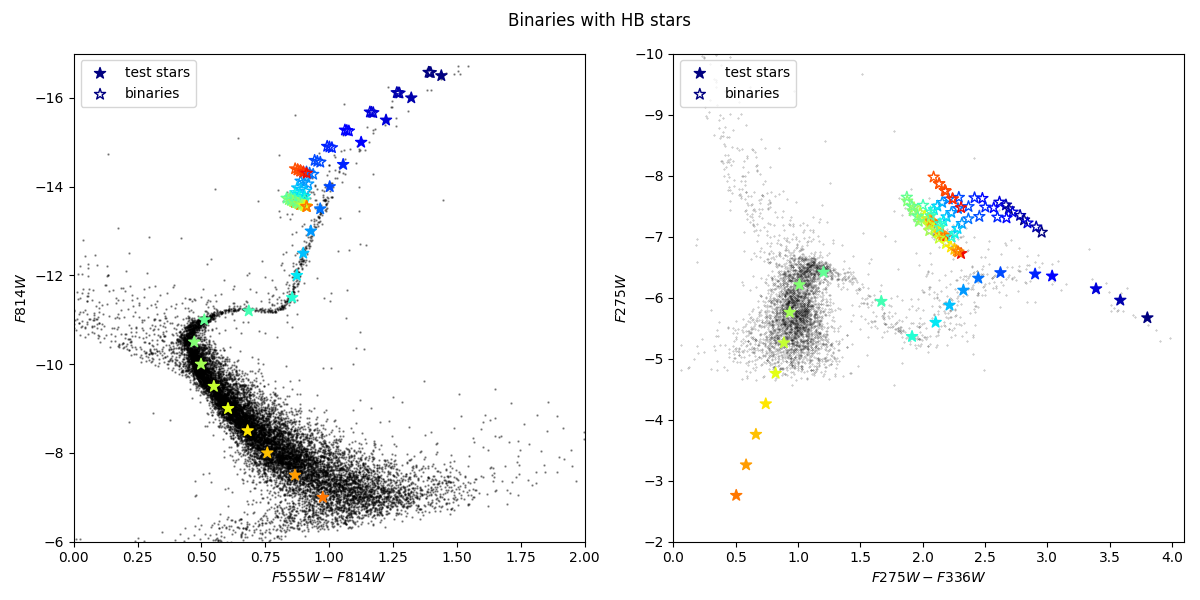

In [13]:
plt.figure(figsize=(12, 6))

# plot optical filters
plt.subplot(1, 2, 1)

plt.scatter(data_B90_cluster['F555W']-data_B90_cluster['F814W'], data_B90_cluster['F814W'], s=0.5, c='black', alpha=0.4, zorder=1)
plt.scatter(test_stars['F555W']-test_stars['F814W'], test_stars['F814W'], s=70, c=color_test, label='test stars', marker='*', zorder=2)
plt.scatter(binaries_vis_HB['F555W']-binaries_vis_HB['F814W'], binaries_vis_HB['F814W'], s=70, edgecolor=color_vis, facecolors='none', label='binaries', marker='*', zorder=3)
plt.gca().invert_yaxis()

plt.xlim(0,2)
plt.ylim(-6,-17)

plt.xlabel(r'$F555W-F814W$')
plt.ylabel(r'$F814W$')
plt.legend(loc='upper left')

# plot UV filters
plt.subplot(1, 2, 2)

plt.scatter(data_B90_cluster['F275W']-data_B90_cluster['F336W'], data_B90_cluster['F275W'], s=0.1, c='black', alpha=0.4, zorder=1)
plt.scatter(test_stars['F275W']-test_stars['F336W'], test_stars['F275W'], s=70, c=color_test, label='test stars', marker='*', zorder=2)
plt.scatter(binaries_UV_HB['F275W']-binaries_UV_HB['F336W'], binaries_UV_HB['F275W'], s=70, edgecolors=color_UV, facecolors='none', label='binaries', marker='*', zorder=3)
plt.gca().invert_yaxis()

plt.xlim(0,4.1)
plt.ylim(-2,-10)

plt.xlabel(r'$F275W-F336W$')
plt.ylabel(r'$F275W$')
plt.legend(loc='upper left')

plt.suptitle('Binaries with HB stars')
plt.tight_layout()
plt.show()


----

## UVdim in B90

In [ ]:
fid_uvdim_line = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/fiducial_uvdim_B90.csv')

# Shift the fiducial line in the vertical direction
fid_uvdim_line_shifted = fid_uvdim_line.copy()
fid_uvdim_line_shifted['Y'] = fid_uvdim_line_shifted['Y'] + 0.1

from scipy import interpolate

# Calculate the color for each star
x_stars = data_B90_cluster['F336W'] - data_B90_cluster['F814W']  # F336W - F814W for x-axis
y_stars = data_B90_cluster['F225W'] - data_B90_cluster['F336W']  # F225W - F336W for y-axis

# Create an interpolation function for the fiducial line (based on F336W - F814W for x-axis and F225W - F336W for y-axis)
interp_func = interpolate.interp1d(fid_uvdim_line_shifted['X'], fid_uvdim_line_shifted['Y'], bounds_error=False, fill_value=np.nan)

# Get the interpolated fiducial Y values for each star's x-coordinate
y_fiducial_interpolated = interp_func(x_stars)

# Now, select stars above the fiducial line
uv_dim_candidate = data_B90_cluster[
    (y_stars > y_fiducial_interpolated) &  # Stars above the shifted fiducial line
    (x_stars < 1.3)  # Optional condition, adjust as necessary
]

print('UV-dim candidates:', len(uv_dim_candidate))

# Select stars above the fiducial line belonging to the reference field
uv_dim_contamination = data_reference_field[
    (data_reference_field['F225W'] - data_reference_field['F336W'] > interp_func(data_reference_field['F336W'] - data_reference_field['F814W'])) &  # Stars above the shifted fiducial line
    (data_reference_field['F336W'] - data_reference_field['F814W'] < 1.3)  # Optional condition, adjust as necessary
]

if uv_dim_contamination.empty:
    print("No contamination detected in the UV-dim region.")
else:
    print('Contaminants:', len(uv_dim_contamination))

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(data_B90_cluster['F336W']-data_B90_cluster['F814W'], data_B90_cluster['F225W']-data_B90_cluster['F336W'], s=3, alpha=0.7, c='black', label='NGC 346')
plt.scatter(data_reference_field['F336W']-data_reference_field['F814W'], data_reference_field['F225W']-data_reference_field['F336W'], s=20, alpha=0.5, marker='x', c='orange', label=r'Reference Field')
plt.scatter(uv_dim_candidate['F336W']-uv_dim_candidate['F814W'], uv_dim_candidate['F225W']-uv_dim_candidate['F336W'], s=20, color='green', marker='^', label='UV-dim candidates')
plt.plot(fid_uvdim_line['X'], fid_uvdim_line['Y'], c='red', alpha=0.7)
plt.plot(fid_uvdim_line_shifted['X'], fid_uvdim_line_shifted['Y'], c='blue', alpha=0.7)
plt.xlim(0.3, 2)
plt.ylim(-0.8, 0.6)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F225W-F336W$')
plt.legend(fontsize=9, loc='upper left')
plt.title('B90')

plt.subplot(1,2,2)
plt.scatter(data_reference_field['F336W']-data_reference_field['F814W'], data_reference_field['F225W']-data_reference_field['F336W'], s=15, alpha=0.7, marker='x', c='orange', label=r'Reference Field')
plt.plot(fid_uvdim_line['X'], fid_uvdim_line['Y'], c='red', alpha=0.7)
plt.plot(fid_uvdim_line_shifted['X'], fid_uvdim_line_shifted['Y'], c='blue', alpha=0.7)
plt.xlim(0.3, 2)
plt.ylim(-0.8, 0.6)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F225W-F336W$')
plt.title('Reference Field')

plt.tight_layout()
plt.show()

In [ ]:
# UV-dim detection 
fig, ax = plt.subplots(figsize=(6, 8))
plt.scatter(data_B90_cluster['F225W']-data_B90_cluster['F336W'], data_B90_cluster['F336W'], s=0.5, c='black', label=r'B90', zorder=2)
plt.scatter(data_reference_field['F225W']-data_reference_field['F336W'], data_reference_field['F336W'], s=10, alpha = 0.5, c='orange', marker='x', label=r'Reference Field', zorder=1)
plt.scatter(uv_dim_candidate['F225W']-uv_dim_candidate['F336W'], uv_dim_candidate['F336W'], s=30, c='green', marker='^', label='UV-dim candidates', zorder=3)

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-1,1.5)
plt.ylim(-8,-18)
plt.xlabel(r'$F225W-F336W$')
plt.ylabel(r'$F336W$')
plt.legend()
plt.show()